In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## **Performing an anti join**
In our music streaming company dataset, each customer is assigned an employee representative to assist them. In this exercise, filter the employee table by a table of top customers, returning only those employees who are not assigned to a customer. The results should resemble the results of an anti join. The company's leadership will assign these employees additional training so that they can work with high valued customers.

In [43]:
top_cust = pd.read_csv("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/top_cust.csv")
employees = pd.read_csv("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/employees.csv")

In [44]:
# Merge employees and top_cust
empl_cust = employees.merge(top_cust, on='srid', 
                                 how='left', indicator=True)

# Select the srid column where _merge is left_only
srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']

# Get employees not working with top customers
print(employees[employees['srid'].isin(srid_list)])

   Unnamed: 0  srid     lname    fname            title   hire_date  \
0           0     1     Adams   Andrew  General Manager  2002-08-14   
1           1     2   Edwards    Nancy    Sales Manager  2002-05-01   
5           5     6  Mitchell  Michael       IT Manager  2003-10-17   
6           6     7      King   Robert         IT Staff  2004-01-02   
7           7     8  Callahan    Laura         IT Staff  2004-03-04   

                     email  
0   andrew@chinookcorp.com  
1    nancy@chinookcorp.com  
5  michael@chinookcorp.com  
6   robert@chinookcorp.com  
7    laura@chinookcorp.com  


## **Performing a semi join**
Some of the tracks that have generated the most significant amount of revenue are from TV-shows or are other non-musical audio. You have been given a table of invoices that include top revenue-generating items. Additionally, you have a table of non-musical tracks from the streaming service. In this exercise, you'll use a semi join to find the top revenue-generating non-musical tracks..


In [45]:
non_mus_tcks = pd.read_csv("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/non_mus_tcks.csv")
top_invoices = pd.read_csv("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/top_invoices.csv")
genres = pd.read_csv("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/genres.csv")

In [48]:
# Merge the non_mus_tck and top_invoices tables on tid
"""
Merge non_mus_tcks and top_invoices on tid using an inner join. Save the result as tracks_invoices.
"""
tracks_invoices = non_mus_tcks.merge(top_invoices, on ='tid')

# Use .isin() to subset non_mus_tcks to rows with tid in tracks_invoices
"""
Use .isin() to subset the rows of non_mus_tck where tid is in the tid column of tracks_invoices. Save the result as top_tracks.
"""
top_tracks = non_mus_tcks[non_mus_tcks['tid'].isin(tracks_invoices['tid'])]

# Group the top_tracks by gid and count the tid rows
"""
Group top_tracks by gid and count the tid rows. Save the result to cnt_by_gid.
"""
cnt_by_gid = top_tracks.groupby(['gid'], as_index=False).agg({'tid':"count"})

# Merge the genres table to cnt_by_gid on gid and print
"""
Merge cnt_by_gid with the genres table on gid and print the result.
"""
print(genres.merge(cnt_by_gid, on ='gid'))

   Unnamed: 0  gid      name  tid
0          18   19  TV Shows    4
1          20   21     Drama    2
2          21   22    Comedy    1


## **Concatenation basics**
You have been given a few tables of data with musical track info for different albums from the metal band, Metallica. The track info comes from their Ride The Lightning, Master Of Puppets, and St. Anger albums. Try various features of the .concat() method by concatenating the tables vertically together in different ways.

In [49]:
tracks_master = pd.read_csv("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/tracks_master.csv")
tracks_ride = pd.read_csv("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/tracks_ride.csv")
tracks_st = pd.read_csv("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/tracks_st.csv")

In [50]:
tracks_master

,Unnamed: 0,tid,name,aid,mtid,gid,composer,u_price
0,0,1853,Battery,152,1,3,J.Hetfield/L.Ulrich,0.99
1,1,1854,Master Of Puppets,152,1,3,K.Hammett,0.99
2,4,1857,Disposable Heroes,152,1,3,J.Hetfield/L.Ulrich,0.99


In [52]:
"""
Concatenate tracks_master, tracks_ride, and tracks_st, in that order, setting sort to True.
"""
# Concatenate the tracks
tracks_from_albums = pd.concat([tracks_master,tracks_ride,tracks_st],
                               sort=True)
tracks_from_albums

,Unnamed: 0,aid,composer,gid,mtid,name,tid,u_price
0,0,152,J.Hetfield/L.Ulrich,3,1,Battery,1853,0.99
1,1,152,K.Hammett,3,1,Master Of Puppets,1854,0.99
2,4,152,J.Hetfield/L.Ulrich,3,1,Disposable Heroes,1857,0.99
0,0,154,NaN,3,1,Fight Fire With Fire,1874,0.99
1,1,154,NaN,3,1,Ride The Lightning,1875,0.99
2,2,154,NaN,3,1,For Whom The Bell Tolls,1876,0.99
3,3,154,NaN,3,1,Fade To Black,1877,0.99
4,4,154,NaN,3,1,Trapped Under Ice,1878,0.99
0,0,155,NaN,3,1,Frantic,1882,0.99
1,1,155,NaN,3,1,St. Anger,1883,0.99


In [54]:
"""
Concatenate tracks_master, tracks_ride, and tracks_st, where the index goes from 0 to n-1.
"""
# Concatenate the tracks so the index goes from 0 to n-1
tracks_from_albums = pd.concat([tracks_master,tracks_ride,tracks_st],
                               ignore_index=True,
                               sort=True)
print(tracks_from_albums)

    Unnamed: 0  aid             composer  gid  mtid                     name  \
0            0  152  J.Hetfield/L.Ulrich    3     1                  Battery   
1            1  152            K.Hammett    3     1        Master Of Puppets   
2            4  152  J.Hetfield/L.Ulrich    3     1        Disposable Heroes   
3            0  154                  NaN    3     1     Fight Fire With Fire   
4            1  154                  NaN    3     1       Ride The Lightning   
5            2  154                  NaN    3     1  For Whom The Bell Tolls   
6            3  154                  NaN    3     1            Fade To Black   
7            4  154                  NaN    3     1        Trapped Under Ice   
8            0  155                  NaN    3     1                  Frantic   
9            1  155                  NaN    3     1                St. Anger   
10           2  155                  NaN    3     1     Some Kind Of Monster   
11           3  155                  NaN

In [57]:
"""
Concatenate tracks_master, tracks_ride, and tracks_st, showing only columns that are in all tables.
"""
# Concatenate the tracks, show only columns names that are in all tables
tracks_from_albums = pd.concat([tracks_master,tracks_ride,tracks_st],
                               join='inner',
                               sort=True)
print(tracks_from_albums)

   Unnamed: 0  aid  gid  mtid                     name   tid  u_price
0           0  152    3     1                  Battery  1853     0.99
1           1  152    3     1        Master Of Puppets  1854     0.99
2           4  152    3     1        Disposable Heroes  1857     0.99
0           0  154    3     1     Fight Fire With Fire  1874     0.99
1           1  154    3     1       Ride The Lightning  1875     0.99
2           2  154    3     1  For Whom The Bell Tolls  1876     0.99
3           3  154    3     1            Fade To Black  1877     0.99
4           4  154    3     1        Trapped Under Ice  1878     0.99
0           0  155    3     1                  Frantic  1882     0.99
1           1  155    3     1                St. Anger  1883     0.99
2           2  155    3     1     Some Kind Of Monster  1884     0.99
3           3  155    3     1             Dirty Window  1885     0.99
4           4  155    3     1            Invisible Kid  1886     0.99


## **Concatenating with keys**
The leadership of the music streaming company has come to you and asked you for assistance in analyzing sales for a recent business quarter. They would like to know which month in the quarter saw the highest average invoice total. You have been given three tables with invoice data named inv_jul, inv_aug, and inv_sep. Concatenate these tables into one to create a graph of the average monthly invoice total.

In [58]:
 inv_jul = pd.read_csv("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/inv_jul.csv")
 inv_aug = pd.read_csv("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/inv_aug.csv")
 inv_sep = pd.read_csv("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/inv_sep.csv")

In [59]:
inv_jul.columns

Index(['Unnamed: 0', 'iid', 'cid', 'invoice_date', 'total', 'bill_ctry'], dtype='object')

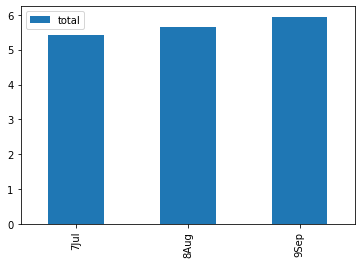

In [61]:
"""
Concatenate the three tables together vertically in order with the oldest month first, adding '7Jul', '8Aug', and '9Sep' as keys for their respective months, and save to variable avg_inv_by_month.
"""

# Concatenate the tables and add keys
inv_jul_thr_sep = pd.concat([inv_jul,inv_aug,inv_sep], 
                            keys=['7Jul', '8Aug','9Sep'])

"""
Use the .agg() method to find the average of the total column from the grouped invoices.
"""
# Group the invoices by the index keys and find avg of the total column
avg_inv_by_month = inv_jul_thr_sep.groupby(level=0).agg({"total":"mean"})

"""
Create a bar chart of avg_inv_by_month.
"""
# Bar plot of avg_inv_by_month
avg_inv_by_month.plot(kind='bar')
plt.show()

## **Using the append method**
The .concat() method is excellent when you need a lot of control over how concatenation is performed. However, if you do not need as much control, then the .append() method is another option. You'll try this method out by appending the track lists together from different Metallica albums. From there, you will merge it with the invoice_items table to determine which track sold the most.

In [64]:
invoice_items = pd.read_csv("/content/drive/MyDrive/Data Science & Afins/DATACAMP/01. Data Scientist with Python/04. Joining Data with pandas/datasets/invoice_items.csv")

In [66]:
invoice_items.columns

Index(['Unnamed: 0', 'ilid', 'iid', 'tid', 'uprice', 'quantity'], dtype='object')

In [69]:
"""
Use the .append() method to combine (in this order) tracks_ride, tracks_master, and tracks_st together vertically, and save to metallica_tracks.
"""

# Use the .append() method to combine the tracks tables
metallica_tracks = tracks_ride.append([tracks_master,tracks_st], sort=False)

"""
Merge metallica_tracks and invoice_items on tid with an inner join, and save to tracks_invoices.
"""
# Merge metallica_tracks and invoice_items
tracks_invoices = metallica_tracks.merge(invoice_items, on ='tid', how ='inner')

"""
For each tid and name in tracks_invoices, sum the quantity sold column, and save as tracks_sold.
"""
# For each tid and name sum the quantity sold
tracks_sold = tracks_invoices.groupby(['tid','name']).agg({'quantity':'sum'})

"""
Sort tracks_sold in descending order by the quantity column, and print the table.
"""
# Sort in decending order by quantity and print the results
print(tracks_sold.sort_values(by='quantity',ascending=False))

                              quantity
tid  name                             
1853 Battery                         2
1876 For Whom The Bell Tolls         2
1854 Master Of Puppets               1
1857 Disposable Heroes               1
1875 Ride The Lightning              1
1877 Fade To Black                   1
1882 Frantic                         1
1884 Some Kind Of Monster            1
1886 Invisible Kid                   1
